# **Data Mining(CSE 3054) - Project**



**Submitted to** - Prof. Arup Ghosh

**Slot** - B1 + TB1





**Team Members**

1. *Mokshda Gangrade - 19BDS0067*

2. *Lakshit Kothari - 19BDS0077*

3. *Pranjal Gupta - 19BDS0081*

# Loading Data

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [76]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

from sklearn.metrics import recall_score

In [77]:
att = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [78]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Preprocessing

In [79]:
attFeatures = []
for i in att.columns:
    attFeatures.append([i, att[i].nunique(), att[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,[1]
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


# Preprocessing Scheme 


*   OneHotEncoding: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime
*   The rest will be pass through.



In [80]:
att['Attrition'] = np.where(att['Attrition'] == 'Yes', 1, 0)

*Number **1 is Yes, means** resign and number **0 is No, means stay**.*

In [81]:
att.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

*Dropping these columns because as it only has one value for all rows.*

In [82]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                                                'JobRole', 'MaritalStatus', 'OverTime']),
], remainder = 'passthrough')

In [83]:
att['Attrition'].value_counts()/att.shape[0]*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [84]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


**Splitting data**

In [85]:
X = att.drop('Attrition', axis = 1)
y = att['Attrition']

X.shape

(1470, 31)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 3131)

# Modeling

**Define Model**

We test with 4 models to find the best model:

* Logistic Regression
* Decision Tree Classifier
* K-Nearest Neighbor
* Random Forest Classifier



In [87]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 3131)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 3131)

# Cross Validation

In [88]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,mean score,std score,recall score
0,Logistic Regression,0.041711,0.044120,0.028169
1,Decision Tree Classifier,0.367736,0.076253,0.267606
2,KNN Classifier,0.168449,0.055310,0.112676
3,Random Forest Classifier,0.108556,0.031235,0.126761


*From this method, we will choose Decision Tree Classifier because it has the highest recall score. But overall, the score still not good enough to do a prediction. While we process the data, it already indicates that the data is imbalanced. We decide to handle it using Under Sampling and Over Sampling.*

# Handling Imbalance

UnderSampling

RandomUnderSampler Model

In [89]:
rus = RandomUnderSampler(random_state = 3131)
X_under, y_under = rus.fit_resample(X_train, y_train) 

logreg_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('logreg', logreg)])
tree_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('tree', tree)])
knn_pipe_under = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('rus', rus), ('knn', knn)])
rf_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv
logreg_under_cv = model_evaluation(logreg_pipe_under, 'recall') 
tree_under_cv = model_evaluation(tree_pipe_under, 'recall')
knn_under_cv = model_evaluation(knn_pipe_under, 'recall')
rf_under_cv = model_evaluation(rf_pipe_under, 'recall')

for model in [logreg_pipe_under, tree_pipe_under, knn_pipe_under, rf_pipe_under]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_under_cv.mean(), tree_under_cv.mean(), knn_under_cv.mean(),
              rf_under_cv.mean()]
score_std = [logreg_under_cv.std(), tree_under_cv.std(), knn_under_cv.std(),
             rf_under_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_under.predict(X_test)),
            recall_score(y_test, tree_pipe_under.predict(X_test)), 
            recall_score(y_test, knn_pipe_under.predict(X_test)), 
            recall_score(y_test, rf_pipe_under.predict(X_test))]
method_name = ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling',
              'KNN Classifier UnderSampling', 'Random Forest Classifier UnderSampling']
under_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
under_summary

,method,mean score,std score,recall score
0,Logistic Regression UnderSampling,0.674866,0.113426,0.619718
1,Decision Tree Classifier UnderSampling,0.638146,0.080455,0.647887
2,KNN Classifier UnderSampling,0.602317,0.094931,0.619718
3,Random Forest Classifier UnderSampling,0.668093,0.114557,0.619718


*The score looks good rather than before. From this Under Sampling, we will choose Decision Tree Classifier because it has the highest recall score.*

# OverSampling
RandomOverSampler Model

In [90]:
ros = RandomOverSampler(random_state = 3131)
X_over, y_over = ros.fit_resample(X_train, y_train) 

logreg_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('logreg', logreg)])
tree_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('tree', tree)])
knn_pipe_over = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('ros', ros), ('knn', knn)])
rf_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('rf', rf)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_over_cv = model_evaluation(logreg_pipe_over, 'recall') 
tree_over_cv = model_evaluation(tree_pipe_over, 'recall')
knn_over_cv = model_evaluation(knn_pipe_over, 'recall')
rf_over_cv = model_evaluation(rf_pipe_over, 'recall')
for model in [logreg_pipe_over, tree_pipe_over, knn_pipe_over, rf_pipe_over]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_over_cv.mean(), tree_over_cv.mean(), knn_over_cv.mean(),
              rf_over_cv.mean()]
score_std = [logreg_over_cv.std(), tree_over_cv.std(), knn_over_cv.std(),
             rf_over_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_over.predict(X_test)),
            recall_score(y_test, tree_pipe_over.predict(X_test)), 
            recall_score(y_test, knn_pipe_over.predict(X_test)), 
            recall_score(y_test, rf_pipe_over.predict(X_test))]
method_name = ['Logistic Regression OverSampling', 'Decision Tree Classifier OverSampling',
              'KNN Classifier OverSampling', 'Random Forest Classifier OverSampling']
over_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
over_summary

,method,mean score,std score,recall score
0,Logistic Regression OverSampling,0.632086,0.118270,0.661972
1,Decision Tree Classifier OverSampling,0.307487,0.059830,0.323944
2,KNN Classifier OverSampling,0.536364,0.063275,0.450704
3,Random Forest Classifier OverSampling,0.186631,0.051612,0.183099


*Now, the score getting worse again. The only one who stands out from the others. It's Logistic Regression using Over Sampling method. The recall score is the highest of other models. The rest models indicates underfitting.*


*Based on 3 methods, Cross Validation, Under Sampling, and Over Sampling, we pick Logistic Regression as the most stable model and using Over Sampling method, and continue to HyperParameter Tuning process.*

# HyperParameter Tuning

In [91]:
estimator = Pipeline([
    ('transformer', transformer),
    ('ros', ros),
    ('model', logreg)
])

hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'model__max_iter': [50, 100, 150, 200],
    'model__random_state': [3131]
}

random = RandomizedSearchCV(
                estimator,
                param_distributions = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_iter = 10,
                n_jobs = -1)

random.fit(X_train, y_train)

print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.752584670231729
best param {'model__solver': 'newton-cg', 'model__random_state': 3131, 'model__max_iter': 200, 'model__C': 0.1}


*After HyperParameter Tuning process, the score is getting higher, it means that tuning process can improve the model.*

# Compairing Result

In [92]:
estimator.fit(X_train, y_train)
y_pred_estimator = estimator.predict(X_test)
recall_estimator = recall_score(y_test, y_pred_estimator)

random.best_estimator_.fit(X_train, y_train)
y_pred_random = random.best_estimator_.predict(X_test)
recall_best_estimator = recall_score(y_test, y_pred_random)

score_list = [recall_estimator, recall_best_estimator]
method_name = ['Logistic Regression OverSampling Before Tuning', 'Logistic Regression OverSampling After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Logistic Regression OverSampling Before Tuning,0.661972
1,Logistic Regression OverSampling After Tuning,0.676056


***Hence, Logistic Regression OverSampling After Tuning seems like the best model that we got for predicting attrition in this case for IBM Employee Data.***

In [93]:
import seaborn as sns

In [94]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# **Exploratory Data Analysis**

-- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.

Univariate analysis
- Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
- Categorical variable : Bar chart showing frequency in each category

Bivariate analysis
- Continous & Continous : Scatter plots to know how continous variables interact with each other
- Categorical & categorical : Stacked column chart to show how the frequencies are spread between two categorical variables
- Categorical & Continous : Boxplots, Swamplots or even bar charts

-- Detect outliers

-- Feature engineering

In [95]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [96]:
att.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [97]:
att.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [98]:
for i in att:
  print("column",i," - ",att[i].nunique())

column Age  -  43
column Attrition  -  2
column BusinessTravel  -  3
column DailyRate  -  886
column Department  -  3
column DistanceFromHome  -  29
column Education  -  5
column EducationField  -  6
column EmployeeNumber  -  1470
column EnvironmentSatisfaction  -  4
column Gender  -  2
column HourlyRate  -  71
column JobInvolvement  -  4
column JobLevel  -  5
column JobRole  -  9
column JobSatisfaction  -  4
column MaritalStatus  -  3
column MonthlyIncome  -  1349
column MonthlyRate  -  1427
column NumCompaniesWorked  -  10
column OverTime  -  2
column PercentSalaryHike  -  15
column PerformanceRating  -  2
column RelationshipSatisfaction  -  4
column StockOptionLevel  -  4
column TotalWorkingYears  -  40
column TrainingTimesLastYear  -  7
column WorkLifeBalance  -  4
column YearsAtCompany  -  37
column YearsInCurrentRole  -  19
column YearsSinceLastPromotion  -  16
column YearsWithCurrManager  -  18


In [99]:
#pd.get_dummies()
#att = pd.get_dummies(att, prefix=['BusinessTravel'], columns=['BusinessTravel'])
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### We make correlation matrix and histograms to find the relationships between the target variable ie. Attrition and other variables 

In [100]:
att[att.columns[1:]].corr()['Attrition'][:]

Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

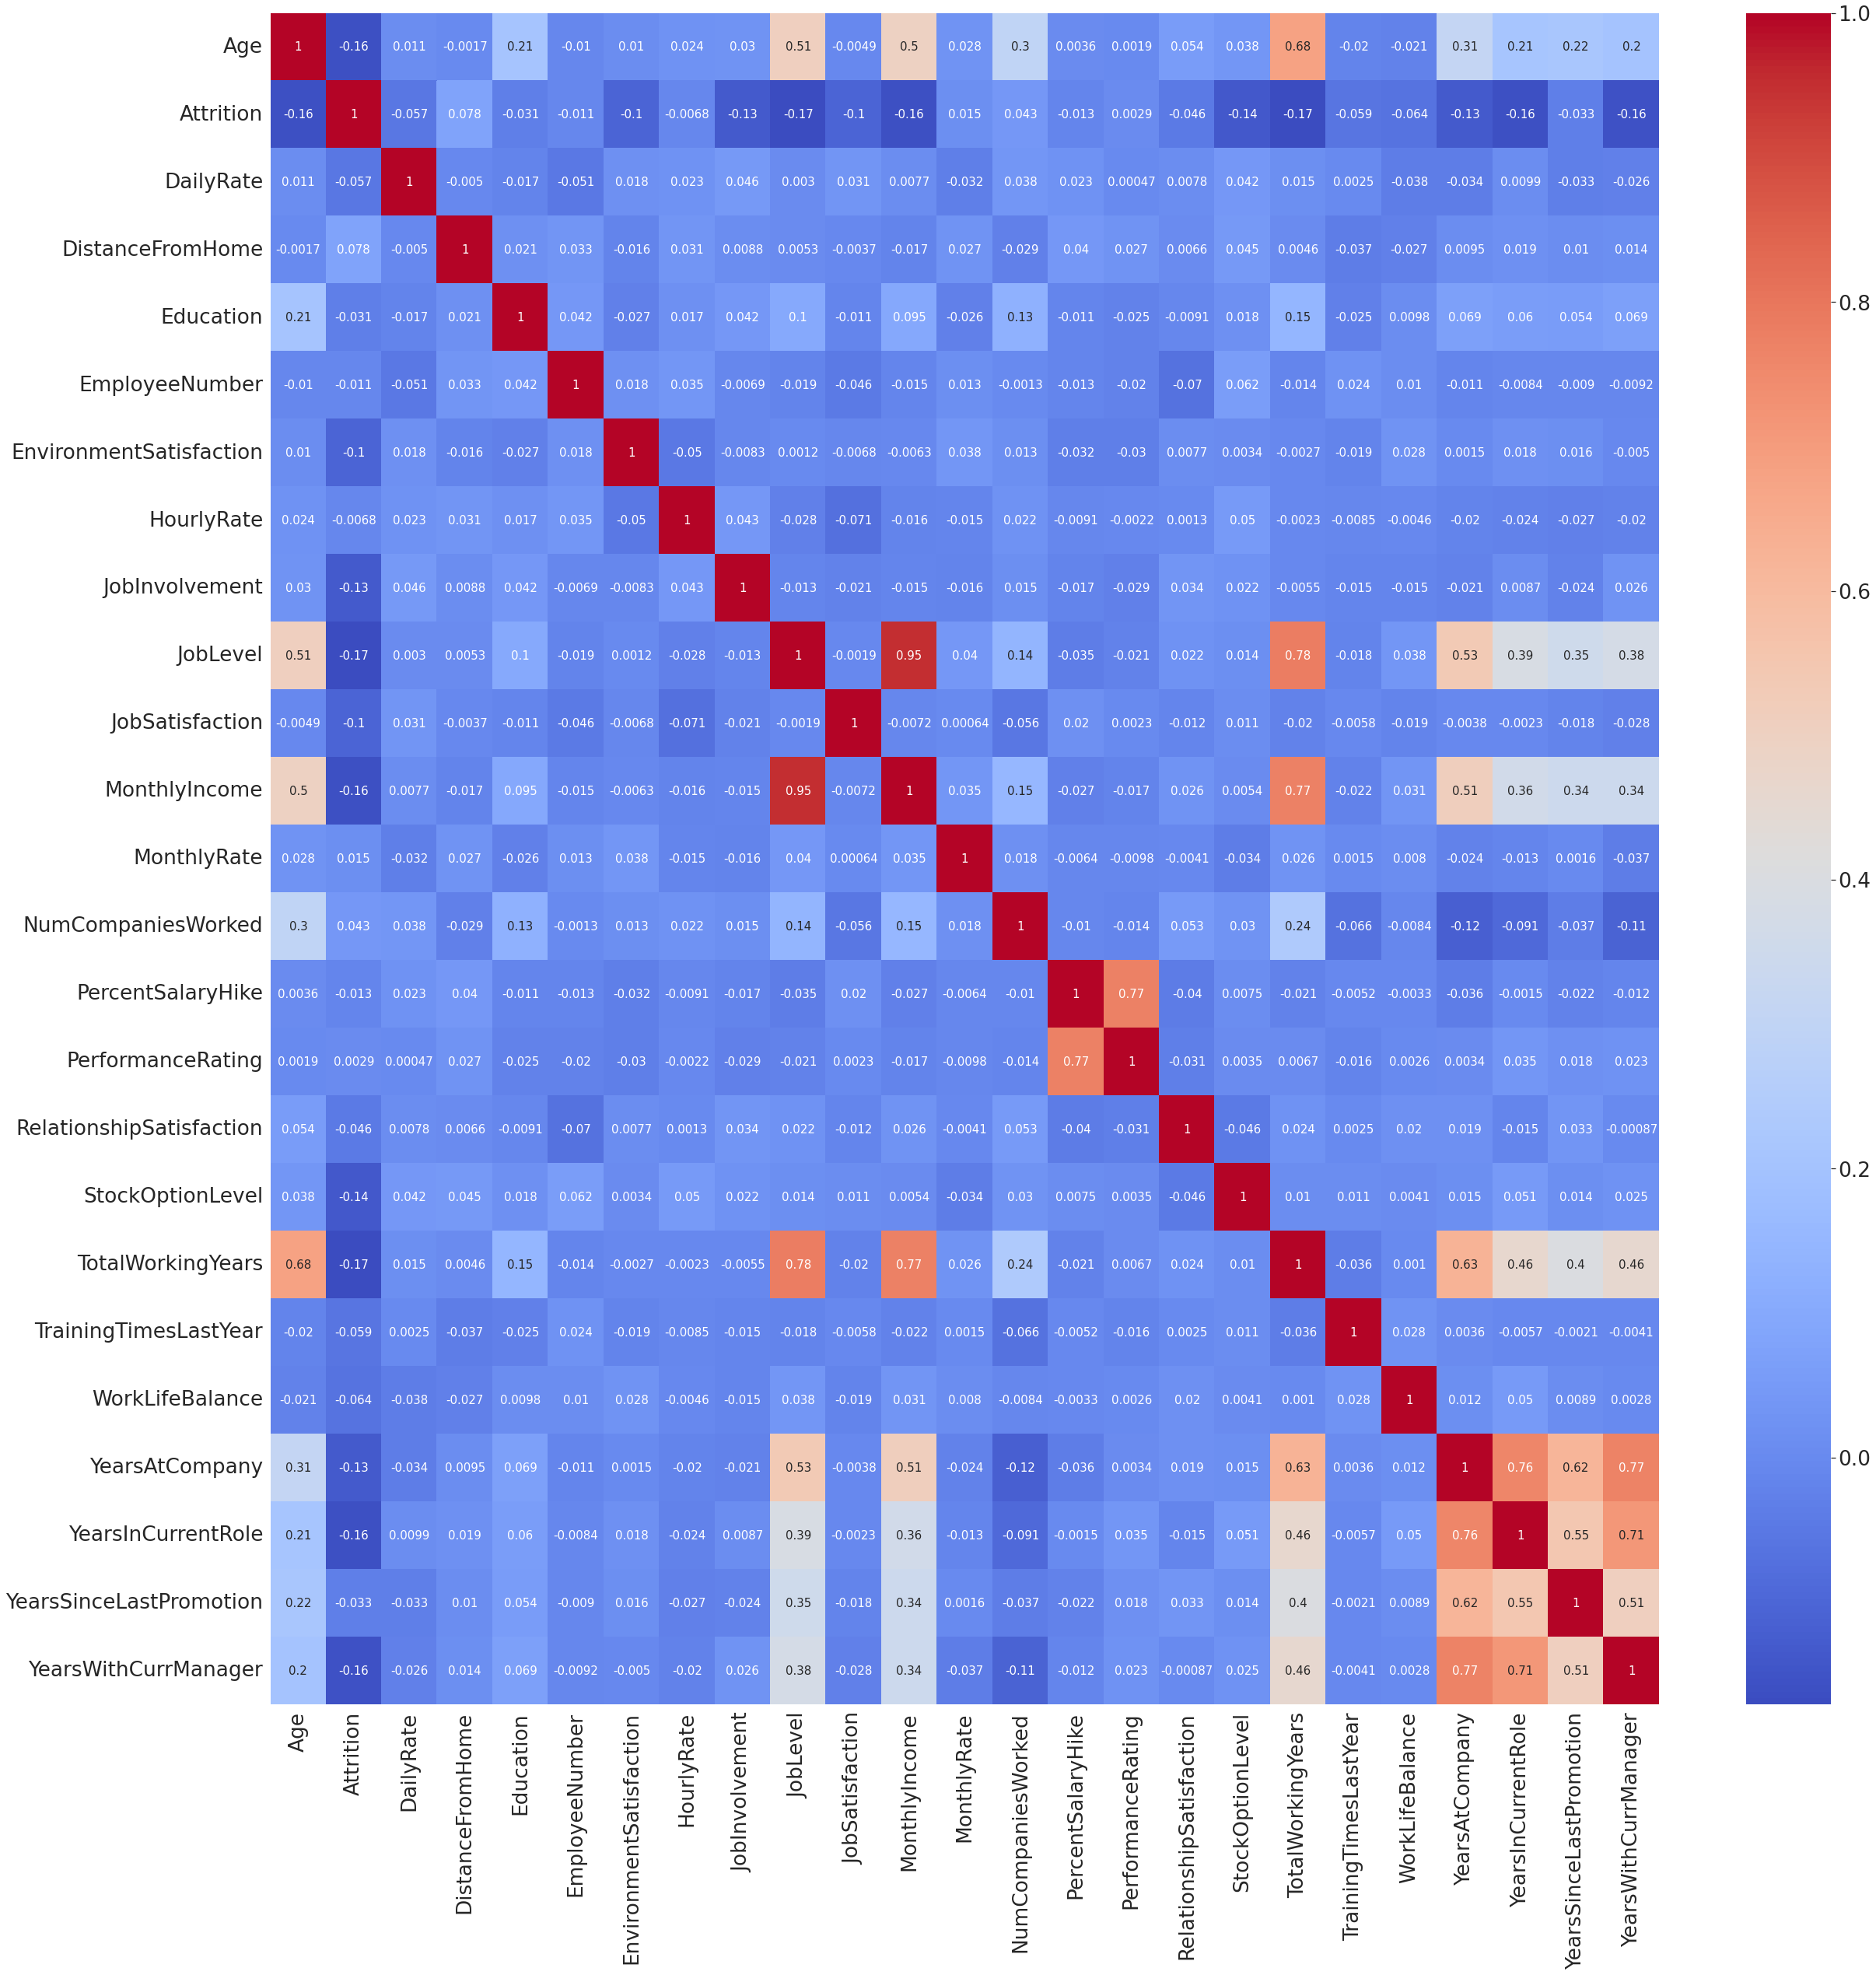

In [101]:
sns.set(font_scale=2.4)
plt.figure(figsize=(40, 40))
sns.heatmap(att.corr(), annot=True, cmap="coolwarm", annot_kws={'size': 15})

### **Analysis of correlation results (sample analysis):**
Monthly income is highly correlated with Job level.

Job level is highly correlated with total working hours.

Monthly income is highly correlated with total working hours.

Age is also positively correlated with the Total working hours.

Marital status and stock option level are negatively correlated

### *Number **1 is Yes, means** resign and number **0 is No, means stay**.*


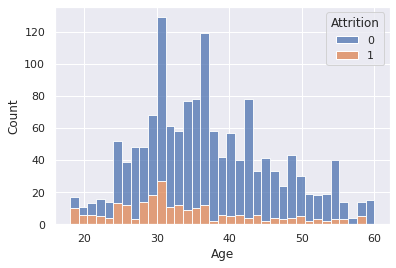

In [102]:
sns.set(font_scale=1.0)
sns.histplot(data=att, x="Age", hue="Attrition", multiple="stack", bins=35)

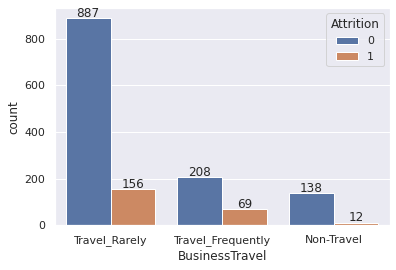

In [103]:
#sns.histplot(data=att, x="Age", hue="Attrition", multiple="stack")
#plt.figure(figsize=[15,15])
ax = sns.countplot(data=att, x="BusinessTravel", hue="Attrition")
# to display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+20), 
                   ha = 'center', va = 'center')
plt.show()

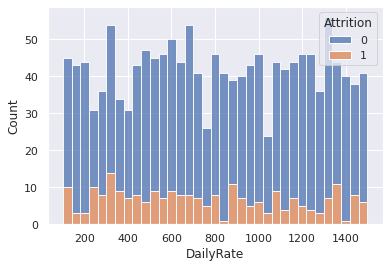

In [104]:
sns.histplot(data=att, x="DailyRate", hue="Attrition", multiple="stack", bins=35)

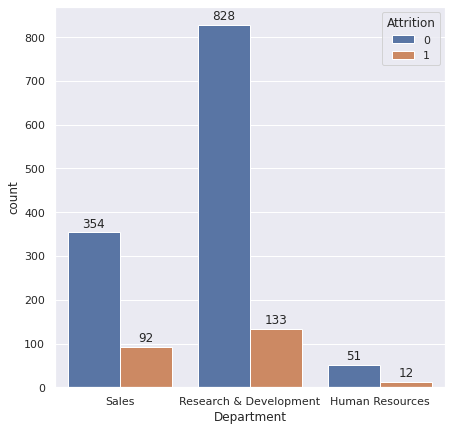

In [105]:
plt.figure(figsize=[7,7])
ax = sns.countplot(data=att, x="Department", hue="Attrition")
# to display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+20), 
                   ha = 'center', va = 'center')
plt.show()

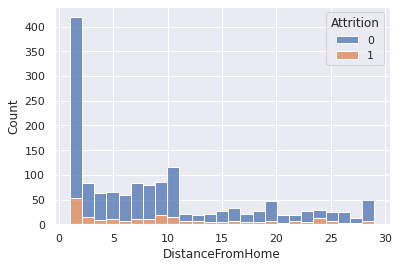

In [106]:
sns.histplot(data=att, x="DistanceFromHome", hue="Attrition", multiple="stack", bins=25)

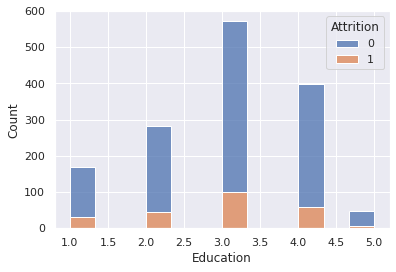

In [107]:
sns.histplot(data=att, x="Education", hue="Attrition", multiple="stack")

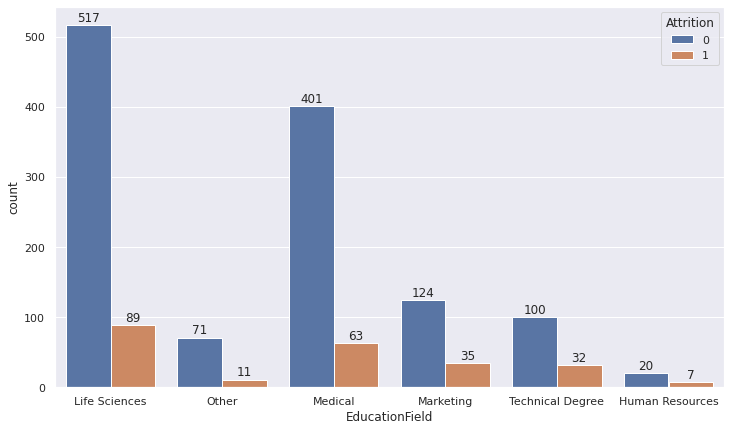

In [108]:
plt.figure(figsize=[12,7])
ax = sns.countplot(data=att, x="EducationField", hue="Attrition")
# to display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+10), 
                   ha = 'center', va = 'center')
plt.show()

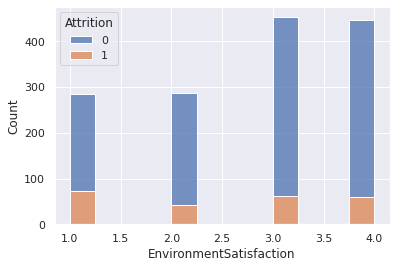

In [109]:
sns.histplot(data=att, x="EnvironmentSatisfaction", hue="Attrition", multiple="stack")

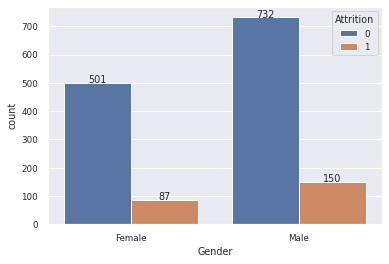

In [110]:
#plt.figure(figsize=[12,7])
sns.set(font_scale=0.8)
ax = sns.countplot(data=att, x="Gender", hue="Attrition")
# to display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+10), 
                   ha = 'center', va = 'center')
plt.show()

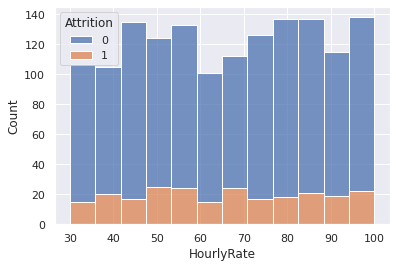

In [111]:
sns.set(font_scale=1.0)
sns.histplot(data=att, x="HourlyRate", hue="Attrition", multiple="stack")

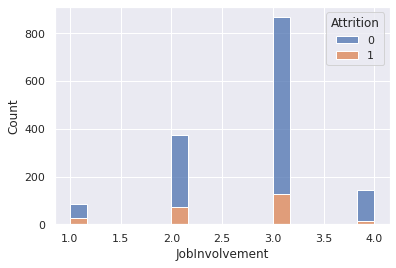

In [112]:
sns.histplot(data=att, x="JobInvolvement", hue="Attrition", multiple="stack")

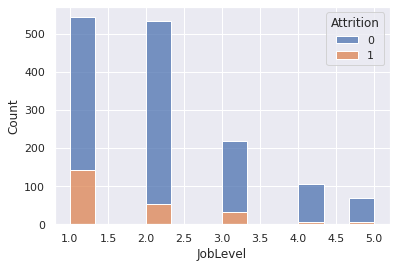

In [113]:
sns.histplot(data=att, x="JobLevel", hue="Attrition", multiple="stack")

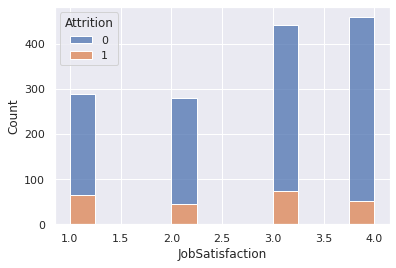

In [114]:
sns.histplot(data=att, x="JobSatisfaction", hue="Attrition", multiple="stack")

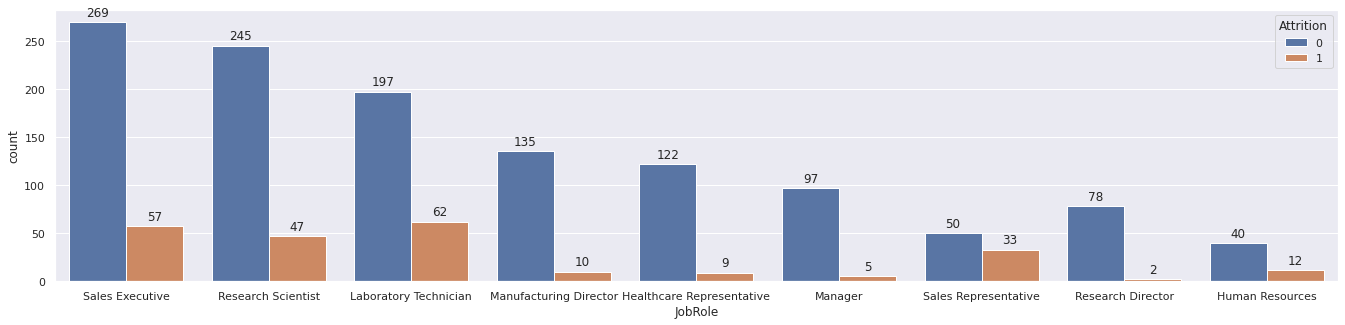

In [115]:
plt.figure(figsize=[23,5])
ax = sns.countplot(data=att, x="JobRole", hue="Attrition")
# to display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+10), 
                   ha = 'center', va = 'center')
plt.show()

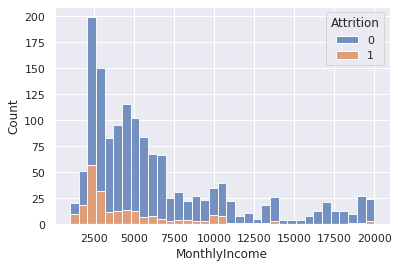

In [116]:
sns.histplot(data=att, x="MonthlyIncome", hue="Attrition", multiple="stack",bins=35)

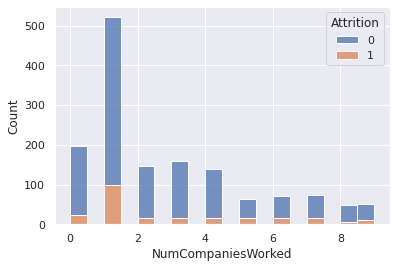

In [117]:
sns.histplot(data=att, x="NumCompaniesWorked", hue="Attrition", multiple="stack")

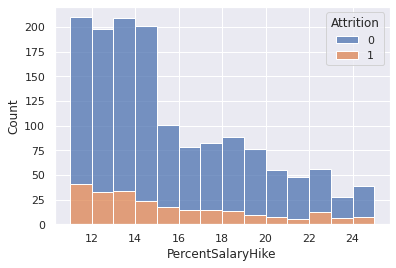

In [118]:
sns.histplot(data=att, x="PercentSalaryHike", hue="Attrition", multiple="stack")

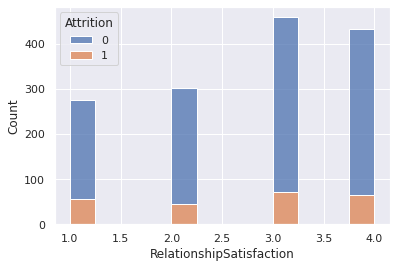

In [119]:
sns.histplot(data=att, x="RelationshipSatisfaction", hue="Attrition", multiple="stack")

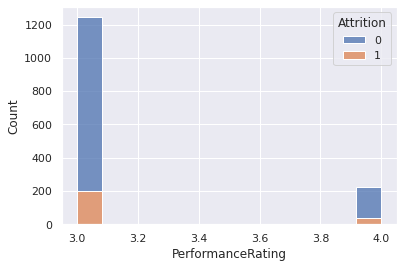

In [120]:
sns.histplot(data=att, x="PerformanceRating", hue="Attrition", multiple="stack")

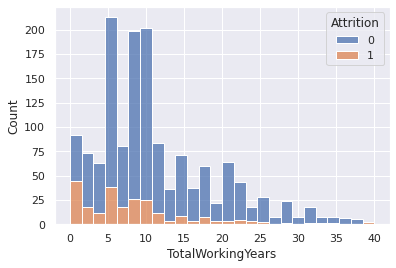

In [121]:
sns.histplot(data=att, x="TotalWorkingYears", hue="Attrition", multiple="stack")

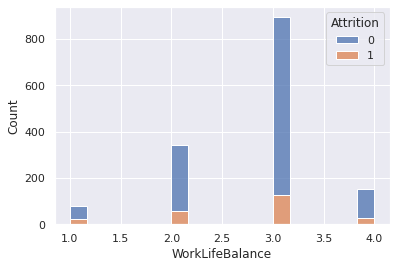

In [122]:
sns.histplot(data=att, x="WorkLifeBalance", hue="Attrition", multiple="stack")

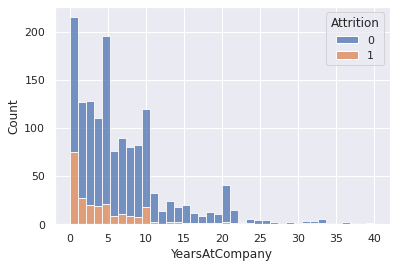

In [123]:
sns.histplot(data=att, x="YearsAtCompany", hue="Attrition", multiple="stack")

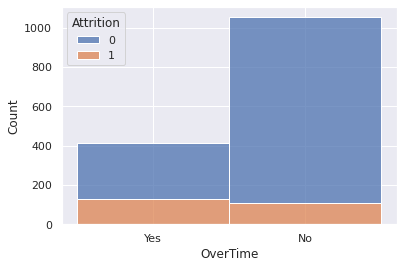

In [124]:
sns.histplot(data=att, x="OverTime", hue="Attrition", multiple="stack")

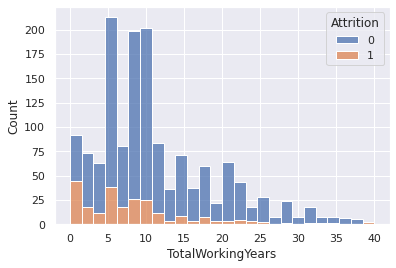

In [125]:
sns.histplot(data=att, x="TotalWorkingYears", hue="Attrition", multiple="stack")


It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and
RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.




# **Applying the Model for prediction**

We had concluded above that Logistic Regression is the best suited model to predit the Attrition

In [126]:
#pd.get_dummies()
att = pd.get_dummies(att, prefix=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'],columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'])
att = pd.get_dummies(att, prefix=['OverTime'], columns=['OverTime'])

In [127]:
att.shape

(1470, 53)

In [128]:
att.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [129]:
att.shape

(1470, 53)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = att.drop('Attrition', axis=1)
y = att.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    final_y_pred=[]
    for i in y_test_pred:
      if(i==0):
        final_y_pred.append('No')
      else:
        final_y_pred.append('Yes')
    print("Prediction Result: 1 means Resign, 0 means Stay\nSo for every test set employee, 0/1 represents whether they will stay\leave the company\n==========================================================")
    print(y_test_pred)
    print()
    print("Here: Yes means the employee will leave\nNo means the employee will stay")
    print(final_y_pred)
    print()
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [132]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

Prediction Result: 1 means Resign, 0 means Stay
So for every test set employee, 0/1 represents whether they will stay\leave the company
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 